![banner](./images/banner.png "banner")

# <font color=#6290C3>Modelo de aprendizaje automático para la predicción del Ratio Internacional Normalizado (INR) en pacientes bajo terapia con Antagonistas de la Vitamina K </font>

1. [Descripción del proyecto](#project-description)  
    1.1 [Objetivos](#project-description-goal)  
    1.2 [Data](#project-description-data)  
    1.3 [Software](#project-description-software)  

2. [Exploración y visualización de datos](#project-description)  
    2.1 [Carga de datos](#project-description-goal)  
    2.2 [Generación del csv](#project-description-data)  
    2.3 [Limpieza de datos](#project-description-data)  

<h2 id="project-description"><font color="#6290C3">1. Descripción del proyecto</font></h2>
Este proyecto consiste en una predición de datos ....

- Es una tarea supervisada, es decir, el modelo se ha de entrar con muchos datos. Una vez entrenado el modelo, lo aplicamos a una nueva fila donde falta un valor, aquello que queremos predecir, y si el entrenamiento fue bueno, el modelo podrá predecir ese dato que falta. Las columnas para las que sí conocemos siempre todos los valores se llaman "características" o "features" en inglés.

- El dato que les falta a esas nuevas filas es el correspondiente a la columna 'target' (también llamado "destino" "objetivo" o "outcome") y es lo que intentamos predecir, en este caso, es la clase a la que pertenece cada fila.

- La columna 'target' tiene valores continuos, por lo que usaremos modelos de regresión.

- Los datos de nuestra columna "target" puede tomar distintos valores entre los rangos 0.1 y 3.0

- Si los datos no hubieran sido etiquetados (es decir, las clases no estuvieran definidas desde el inicio), necesitaríamos un modelo de aprendizaje automático no supervisado (es decir, el modelo debe encontrar los grupos o 'clusters' en inglés).

Ajustaremos los modelos de regresión de aprendizaje automático más populares a unos datos de pacientes con anticoagulantes y seleccionaremos el modelo con mejor rendimiento. Para verificar el rendimiento del modelo, separamos aleatoriamente el conjunto de datos en 3 subconjuntos:

- Un subconjunto de datos para entrenar el modelo: representan los datos 'antiguos', donde no faltan valores, es decir, todos los valores de todas las columnas incluida la 'target' son conocidos, así sabemos si eses pacientes sufrieron o no fallo cardíaco,

- Un subconjunto de los datos para validar el modelo: representan datos 'nuevos' porque reservamos los valores de la columna 'target', los separamos y los guardamos, es decir, pretendemos que no existen, como si fueran nueves pacientes, le damos ese subconjunto de validación al modelo ya entrenado y comparamos los resultados del modelo, es decir, sus prediciones, con los valores reales que teníamos reservados. Como ajustaremos los parámetros para hacer que los resultados del modelo se acerquen cada vez más a los valores reales, el modelo verá este conjunto de datos de validación con mucha frecuencia, lo que puede hacer que el modelo se desvíe, muestre preferencia o sesgo ('bias' en inglés) hacia el conjunto de datos de validación (explicamos la definición de sesgo en los siguientes Jupyter Notebooks sobre Explicabilidad XAI.ipynb y Cuantificación de Incertidumbre UQ.ipynb en este mismo repositorio), es decir, puede estar sobreajustado ('overfitted') y no generalizar bien cuando lo aplicamos a otros datos, por eso separamos un último grupo:

- Un subconjunto de los datos para probar los resultados del modelo: para la verificación final que compara los resultados del modelo ajustado con datos que el modelo entrenado y validado nunca ha visto antes; es la mejor manera que tenemos de simular nuevos datos reales. 

<h3 id="project-description-goal" style="color:#6290C3;">1.1 Objetivos</h3>

El objetivo es predecir el INR de un paciente con anticoagulantes mediante varaibles analiticas y ritmo de vida... y otras características consideradas factores de riesgo. Las conclusiones de este análisis pueden ayudar en la detección temprana y la prevención de diagnosticos complicados.

<h3 id="project-description-goal" style="color:#6290C3;">1.2 Datos</h3>

El conjunto de datos que usamos para entrenar nuestro modelo son datos sinteticos de Synthnea, un software opensource de estados unidos. Este programa generará mediante sus comandos historias completas de pacientes.

Para ejecutar el programa ejecutremos `java -jar synthea.jar` este procesará los valores que se indiquen en el archivo de configuración **synthea.properties** indicaremos lo siguiente:

- default_population = 5.000 -> cantida de pacientes
- exporter.csv.export = true  -> se exportaran los datos a ficheros csv
- exporter.csv.append_mode = true   -> si se ejecuta otra vez el archivo se actualizaran los datos del csv
- generate.modules = cardiovascular_disease, atrial_fibrillation, venous_thromboembolism  -> permite priorizar la generación de pacientes con estas patologias.


Synthea export data as CSV into `./output/csv`.  Las historias de pacientes se reparten en los siguientes csv.

| File | Description |
|------|-------------|
| [`allergies.csv`](#allergies) | Patient allergy data. |
| [`careplans.csv`](#careplans) | Patient care plan data, including goals. |
| [`claims.csv`](#claims) | Patient claim data. |
| [`claims_transactions.csv`](#claims-transactions) | Transactions per line item per claim. |
| [`conditions.csv`](#conditions) | Patient conditions or diagnoses. |
| [`devices.csv`](#devices) | Patient-affixed permanent and semi-permanent devices. |
| [`encounters.csv`](#encounters) | Patient encounter data. |
| [`imaging_studies.csv`](#imaging-studies) | Patient imaging metadata. |
| [`immunizations.csv`](#immunizations) | Patient immunization data. |
| [`medications.csv`](#medications) | Patient medication data. |
| [`observations.csv`](#observations) | Patient observations including vital signs and lab reports. |
| [`organizations.csv`](#organizations) | Provider organizations including hospitals. |
| [`patients.csv`](#patients) | Patient demographic data. |
| [`payer_transitions.csv`](#payer-transitions) | Payer Transition data (i.e. changes in health insurance). |
| [`payers.csv`](#payers) | Payer organization data. |
| [`procedures.csv`](#procedures) | Patient procedure data including surgeries. |
| [`providers.csv`](#providers) | Clinicians that provide patient care. |
| [`supplies.csv`](#supplies) | Supplies used in the provision of care. |


Para nuestro analisis solo utilizaremos:

# Observations
| | Column Name | Data Type | Required? | Description |
|-|-------------|-----------|-----------|-------------|
| | Date | iso8601 UTC Date (`yyyy-MM-dd'T'HH:mm'Z'`) | `true` | The date and time the observation was performed. |
| | Patient | UUID | `true` | Foreign key to the Patient. |
| | Encounter | UUID | `true` | Foreign key to the Encounter where the observation was performed. |
| | Category | String | `false` | Observation category. |
| | Code | String | `true` | Observation or Lab code from LOINC |
| | Description | String | `true` | Description of the observation or lab. |
| | Value | String | `true` | The recorded value of the observation. Often numeric, but some values can be verbose, for example, multiple-choice questionnaire responses. |
| | Units | String | `false` | The units of measure for the value. |
| | Type | String | `true` | The datatype of `Value`: `text` or `numeric` |


# Patients
| | Column Name | Data Type | Required? | Description |
|-|-------------|-----------|-----------|-------------|
| | Id | UUID | `true` | Primary Key. Unique Identifier of the patient. |
| | BirthDate | Date (`YYYY-MM-DD`) | `true` | The date the patient was born. |
| | DeathDate | Date (`YYYY-MM-DD`) | `false` | The date the patient died. |
| | SSN | String | `true` | Patient Social Security identifier. |
| | Drivers | String | `false` | Patient Drivers License identifier. |
| | Passport | String | `false` | Patient Passport identifier. |
| | Prefix | String | `false` | Name prefix, such as `Mr.`, `Mrs.`, `Dr.`, etc. |
| | First | String | `true` | First name of the patient. |
| | Middle | String | `false` | Middle name of the patient. |
| | Last | String | `true` | Last or surname of the patient. |
| | Suffix | String | `false` | Name suffix, such as `PhD`, `MD`, `JD`, etc. |
| | Maiden | String | `false` | Maiden name of the patient. |
| | Marital | String | `false` | Marital Status. `M` is married, `S` is single. Currently no support for divorce (`D`) or widowing (`W`) |
| | Race | String | `true` | Description of the patient's primary race. |
| | Ethnicity | String | `true` | Description of the patient's primary ethnicity. |
| | Gender | String | `true` | Gender. `M` is male, `F` is female. |
| | BirthPlace | String | `true` | Name of the town where the patient was born. |
| | Address | String | `true` | Patient's street address without commas or newlines. |
| | City | String | `true` | Patient's address city. |
| | State | String | `true` | Patient's address state. |
| | County | String | `false` | Patient's address county. |
| | FIPS County Code | String | `false` | Patient's FIPS county code. |
| | Zip | String | `false` | Patient's zip code. |
| | Lat | Numeric | `false` | Latitude of Patient's address. |
| | Lon | Numeric | `false` | Longitude of Patient's address. |
| | Healthcare_Expenses | Numeric | `true` | The total lifetime cost of healthcare to the patient (i.e. what the patient paid). |
| | Healthcare_Coverage | Numeric | `true` | The total lifetime cost of healthcare services that were covered by Payers (i.e. what the insurance company paid). |
| | Income | Numeric | `true` | Annual income for the Patient |


El variable 'target', es decir, lo que queremos predecir, se llama "INR", y es una variable continua que toma las siguientes interpretaciones:

- <2.0: sí, es decir, pacientes que sí presentan riesgo de padecer una cardiopatía,
- 2.0 y 3.0: no, es decir, pacientes que no presentan riesgo de padecer una cardiopatía.
- 3.0: no, es decir, pacientes que no presentan riesgo de padecer una cardiopatía.

## 1.3 Software

Importamos las siguientes librerías:

In [3]:
import pandas as pd
import numpy as np

#utils files
from utils.cleaner_category_match import *
from utils.cleaner_shorter_categories import *

# data exploration and preparation  
#from sklearn.metrics import mutual_info_score, roc_auc_score
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction import DictVectorizer 
#from sklearn.preprocessing import StandardScaler 

# plotting and displaying in the notebook
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn import tree

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# machine learning models
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


# model evaluation
#from sklearn.metrics import accuracy_score, f1_score, auc, recall_score, precision_score, confusion_matrix
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV, KFold, cross_val_score





# ignore warnings
#import warnings
#warnings.filterwarnings("ignore")

#%matplotlib inline

# 2. Exploración y visualización de datos

## 2.1 Carga de datos

Vamos a cargar los datos del fichero `patients.csv`:

In [4]:
df_patients = pd.read_csv("data/patients.csv")
df_patients.head()
#df_patients.info()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,b7822130-1517-3e23-decc-f2ed09c895e6,1968-04-30,NaN,999-69-8092,S99943430,X29170225X,Mrs.,Kiersten731,Julianna856,O'Hara248,...,Maynard,Massachusetts,Middlesex County,25017.0,1754,42.413757,-71.432504,43696.32,1163198.71,103064
1,8a61c160-ef39-fc94-5d34-058856eb980f,1967-03-07,NaN,999-94-9323,S99975833,X54176475X,Ms.,Elwanda490,Angele108,Smith67,...,Woburn,Massachusetts,Middlesex County,25017.0,1890,42.468290,-71.099257,297576.83,1671648.53,29712
2,417c2332-884f-5d92-7aaa-34fdc4210fc0,1960-04-26,NaN,999-54-9267,S99991952,X68442483X,Mrs.,Sandi885,NaN,Leannon79,...,East Longmeadow,Massachusetts,Hampden County,NaN,0,42.109412,-72.463043,386536.66,587114.90,179106
3,5acd3be8-56b2-6fb0-10ae-7cce6695f456,1971-06-19,NaN,999-79-9186,S99982125,X60103449X,Mr.,Giuseppe872,Mike230,Douglas31,...,Hudson,Massachusetts,Middlesex County,25017.0,1749,42.410253,-71.548368,148803.35,5390.13,87760
4,e5c7b433-e52b-b22f-1eb3-b6bbdc03cdef,1970-01-16,NaN,999-88-4683,S99957545,X7028318X,Mrs.,Fairy757,Candie120,Gutmann970,...,Lee,Massachusetts,Berkshire County,25003.0,1238,42.338015,-73.194752,737551.25,540698.89,64021


El conjunto de datos contiene información de **5826 pacientes y 28 variables que describen sus características básicas y demográficas**, como edad, género, etnia, estado civil, lugar de nacimiento e ingresos. Incluye además datos administrativos (por ejemplo, número de seguro social o pasaporte) y médicos (como cobertura de salud). En general, ofrece una visión completa del perfil socio-demográfico de cada paciente.

Vamos a cargar los datos del fitchero `medications.csv`

In [5]:
df_medications = pd.read_csv("data/medications.csv")
df_medications.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2015-09-15T12:48:33Z,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,a735bf55-83e9-331a-899d-a82a60b9f60c,b7822130-1517-3e23-0f27-e41c31c50bf8,310798,Hydrochlorothiazide 25 MG Oral Tablet,0.91,0.0,4,3.64,59621000.0,Essential hypertension (disorder)
1,2015-09-15T12:48:33Z,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,a735bf55-83e9-331a-899d-a82a60b9f60c,b7822130-1517-3e23-0f27-e41c31c50bf8,860975,24 HR Metformin hydrochloride 500 MG Extended ...,6.22,0.0,12,74.64,44054006.0,Diabetes mellitus type 2 (disorder)
2,2015-09-15T12:48:33Z,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,a735bf55-83e9-331a-899d-a82a60b9f60c,b7822130-1517-3e23-0f27-e41c31c50bf8,314076,lisinopril 10 MG Oral Tablet,0.91,0.0,4,3.64,59621000.0,Essential hypertension (disorder)
3,2015-09-15T12:48:33Z,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,a735bf55-83e9-331a-899d-a82a60b9f60c,b7822130-1517-3e23-0f27-e41c31c50bf8,308136,amLODIPine 2.5 MG Oral Tablet,0.91,0.0,4,3.64,59621000.0,Essential hypertension (disorder)
4,2016-09-20T12:48:33Z,2017-09-26T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,a735bf55-83e9-331a-899d-a82a60b9f60c,b7822130-1517-3e23-2b0f-dfe3a7340133,310798,Hydrochlorothiazide 25 MG Oral Tablet,0.57,0.0,4,2.28,59621000.0,Essential hypertension (disorder)


El conjunto de datos contiene información de **313751 pacientes distribuidos en 13 variables**, que incluyen detalles sobre fechas de atención, identificación del paciente, tipo de cobertura, códigos y descripciones de las medicaciones, costos asociados y dispensas.

Vamos a cargar los datos del fichero `observations.csv`:

In [6]:
df_observations = pd.read_csv("data/observations.csv")
df_observations.head()
#df_observations.info()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,b7822130-1517-3e23-2b0f-dfe3a7340133,laboratory,4548-4,Hemoglobin A1c/Hemoglobin.total in Blood,6.2,%,numeric
1,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,b7822130-1517-3e23-2b0f-dfe3a7340133,vital-signs,8302-2,Body Height,162.5,cm,numeric
2,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,b7822130-1517-3e23-2b0f-dfe3a7340133,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
3,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,b7822130-1517-3e23-2b0f-dfe3a7340133,vital-signs,29463-7,Body Weight,80.9,kg,numeric
4,2016-09-20T12:48:33Z,b7822130-1517-3e23-decc-f2ed09c895e6,b7822130-1517-3e23-2b0f-dfe3a7340133,vital-signs,39156-5,Body mass index (BMI) [Ratio],30.6,kg/m2,numeric


Este conjunto de datos es considerablemente amplio, con **4627376 registros y 9 variables** que describen distintas interacciones clínicas de los pacientes. Contiene información sobre la fecha, tipo de encuentro, categoría médica, código y descripción de cada evento, así como los valores y unidades asociados. Representa un registro detallado de las actividades y mediciones realizadas en el contexto sanitario.

Dentro de este conjunto se identifica nuestra **variable objetivo 'target', que indica si el paciente cuenta con un registro de INR** y el valor correspondiente. Esta variable permite evaluar la presencia y magnitud de dicha medición, siendo la clave de este análisis.

## 2.2 Generación del csv

Se filtran los registros para incluir únicamente **pacientes vivos**, **medicación especifica de anticoagulantes** y aquellos pacientes con **controles de INR**, dado que el análisis se enfoca en esta medición. A continuación, se procede a **limpiar y depurar** los datos del subconjunto obtenido, asegurando su calidad y consistencia para el estudio.

**Pacientes difuntos**  
La columna DeathDate indica la fecha de fallecimiento; se eliminarán todos los registros donde este valor no sea nulo, conservando únicamente a los pacientes vivos para el análisis.

In [7]:
print("Cantidad de pacientes vivos:")
print(df_patients['DEATHDATE'].isna().sum())

print("Cantidad de pacientes difuntos:")
print(df_patients['DEATHDATE'].notna().sum())


Cantidad de pacientes vivos:
5000
Cantidad de pacientes difuntos:
826


Actualmente contamos con **5,000 pacientes vivos y 826 pacientes difuntos**. Para el análisis, conservaremos únicamente a los pacientes vivos, eliminando los registros correspondientes a los fallecidos.

In [8]:
df_patients = df_patients[df_patients['DEATHDATE'].isna()]

Una vez filtrados, de cada paciente solo nos interesan tres variables clave: edad, género e identificador, que serán utilizadas para los análisis posteriores.

Para la variable **edad**, primero calculamos los años a partir de la fecha de nacimiento utilizando la diferencia con la fecha actual. Aquellos pacientes que no cuenten con fecha de nacimiento registrada tendrán su edad rellenada con la mediana del conjunto, asegurando que no queden valores nulos y manteniendo la coherencia del dataset.

In [9]:
#convertimos la fecha de nacimiento en formato datetime para el calculo
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'], errors='coerce')

df_patients['AGE'] = ((pd.Timestamp('today') - df_patients['BIRTHDATE']).dt.days / 365.25).astype(int)
df_patients['AGE'] = df_patients['AGE'].fillna(df_patients['AGE'].median())
df_patients = df_patients[['Id','AGE', 'GENDER']]

De cada paciente solo nos interesan tres variables clave de las observaciones : paciente, descripción y valores (incluimos las unidades).

In [10]:
df_observations = df_observations[['PATIENT','DESCRIPTION', 'VALUE']]
df_observations.head(5)

,PATIENT,DESCRIPTION,VALUE
0,b7822130-1517-3e23-decc-f2ed09c895e6,Hemoglobin A1c/Hemoglobin.total in Blood,6.2
1,b7822130-1517-3e23-decc-f2ed09c895e6,Body Height,162.5
2,b7822130-1517-3e23-decc-f2ed09c895e6,Pain severity - 0-10 verbal numeric rating [Sc...,2.0
3,b7822130-1517-3e23-decc-f2ed09c895e6,Body Weight,80.9
4,b7822130-1517-3e23-decc-f2ed09c895e6,Body mass index (BMI) [Ratio],30.6


### Simplificación de las variables y pivotación

Las descripciones de las observaciones indican qué tipo de medición se ha realizado a cada paciente. Para tener una visión clara del contenido del dataset, extraeremos un listado único de los valores registrados en esta columna, lo que nos permitirá identificar y comprender todas las mediciones disponibles.

In [11]:
df_observations['DESCRIPTION'].unique()

array(['Hemoglobin A1c/Hemoglobin.total in Blood', 'Body Height',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Body Weight', 'Body mass index (BMI) [Ratio]',
       'Diastolic Blood Pressure', 'Systolic Blood Pressure',
       'Heart rate', 'Respiratory rate', 'Glucose [Mass/volume] in Blood',
       'Urea nitrogen [Mass/volume] in Blood',
       'Creatinine [Mass/volume] in Blood',
       'Calcium [Mass/volume] in Blood', 'Sodium [Moles/volume] in Blood',
       'Potassium [Moles/volume] in Blood',
       'Chloride [Moles/volume] in Blood',
       'Carbon dioxide  total [Moles/volume] in Blood',
       'Cholesterol [Mass/volume] in Serum or Plasma', 'Triglycerides',
       'Low Density Lipoprotein Cholesterol',
       'Cholesterol in HDL [Mass/volume] in Serum or Plasma',
       'Microalbumin/Creatinine [Mass Ratio] in Urine',
       'Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDR

Para simplificar el conjunto de variables, utilizamos los métodos auxiliares disponibles. En primer lugar, empleamos cleaner_category_match, que nos permite identificar cuántas variables categóricas existen dentro de cada categoría y cómo se emparejan con las cadenas de texto presentes en las observaciones. Este mismo módulo también facilita añadir o eliminar categorías según las necesidades del análisis, ofreciendo un control flexible sobre la organización del dataset.

Las categorías globales disponibles incluyen: vitals, hematology, chemistry coagulation, urinalysis, microbiology, infectious, immunology_allergy, oncology, ophthalmology_imaging, mental_health, social_determinants, demographics, substance_use, administrative y other.

Sin embargo, para este análisis nos centraremos únicamente en las categorías más relevantes: vitals, hematology, chemistry coagulation y un conjunto reducido de observaciones específicas relacionadas con el estado físico y conductual del paciente. Entre estas últimas se encuentran:

- Total score [DAST-10]: puntuación total del Drug Abuse Screening Test, un cuestionario que evalúa el riesgo o presencia de uso problemático de drogas.

- Total score [AUDIT-C]: puntuación del Alcohol Use Disorders Identification Test – Consumption, una medida breve que detecta consumo riesgoso de alcohol.

- PROMIS-10 Global Mental Health (GMH) score: indicador estandarizado que refleja el estado general de salud mental, incluyendo síntomas como ansiedad, depresión y bienestar emocional.

- PROMIS-10 Global Physical Health (GPH) score: medida que evalúa el estado general de salud física, considerando aspectos como dolor, fatiga, movilidad y percepción de salud.

Al quedarnos solo con estas categorías y métricas específicas, garantizamos que el análisis se centre en las variables más relevantes y que la información sea manejable y coherente para los objetivos del estudio.

In [12]:

# Diagnostico de las categorias existentes
diagnose_category_match(df_observations, 'urinalysis', column='DESCRIPTION')

# Eliminar valores de categorias concretas
df_observations = drop_categories(df_observations, ['urinalysis','microbiology','infectious','immunology_allergy','oncology','ophthalmology_imaging','mental_health','social_determinants','demographics','substance_use','administrative','other'], column='DESCRIPTION', fuzzy=True)

df_observations['DESCRIPTION'].unique()


=== Diagnosis for category: urinalysis ===
Variables in category: 28
Unique values in df['DESCRIPTION']: 291

Exact matches found: 27
Examples: ['Nitrite [Presence] in Urine by Test strip', 'Bilirubin.total [Presence] in Urine by Test strip', 'Protein [Presence] in Urine by Test strip']

Partial matches found: 34
Examples: ['Nitrite [Presence] in Urine by Test strip', 'Creatinine', 'Bilirubin.total [Presence] in Urine by Test strip']
Dropping 2538404 rows from categories: ['urinalysis', 'microbiology', 'infectious', 'immunology_allergy', 'oncology', 'ophthalmology_imaging', 'mental_health', 'social_determinants', 'demographics', 'substance_use', 'administrative', 'other']
Sample of dropped values: ['Pain severity - 0-10 verbal numeric rating [Score] - Reported', 'Microalbumin/Creatinine [Mass Ratio] in Urine', 'Within the last year  have you been afraid of your partner or ex-partner?', 'Do you feel physically and emotionally safe where you currently live?', 'Are you a refugee?']


array(['Hemoglobin A1c/Hemoglobin.total in Blood', 'Body Height',
       'Body Weight', 'Body mass index (BMI) [Ratio]',
       'Diastolic Blood Pressure', 'Systolic Blood Pressure',
       'Heart rate', 'Respiratory rate', 'Glucose [Mass/volume] in Blood',
       'Urea nitrogen [Mass/volume] in Blood',
       'Creatinine [Mass/volume] in Blood',
       'Calcium [Mass/volume] in Blood', 'Sodium [Moles/volume] in Blood',
       'Potassium [Moles/volume] in Blood',
       'Chloride [Moles/volume] in Blood',
       'Carbon dioxide  total [Moles/volume] in Blood',
       'Cholesterol [Mass/volume] in Serum or Plasma', 'Triglycerides',
       'Low Density Lipoprotein Cholesterol',
       'Cholesterol in HDL [Mass/volume] in Serum or Plasma',
       'Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD)',
       'Tobacco smoking status', 'Stress level',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Erythr

A continuación, dado que muchas variables poseen nombres extensos y poco intuitivos para utilizarlos como columnas del dataset, recurrimos al segundo método auxiliar: cleaner_shorter_categories. Este recurso nos permite acortar y estandarizar dichas cadenas, generando nombres más claros y manejables sin perder información relevante.

In [13]:
df_observations = shorten_variable_names(
    df_observations, 
    column='DESCRIPTION', 
    inplace=True  # Replace the column
)

df_observations['DESCRIPTION'].unique()



Shortened 688513/2088972 variable names (33.0%)


array(['HbA1c', 'Height', 'Weight', 'BMI', 'DBP', 'SBP', 'Heart_Rate',
       'Respiratory_Rate', 'Glucose', 'BUN', 'Creatinine', 'Calcium',
       'Sodium', 'Potassium', 'Chloride', 'CO2', 'Cholesterol_Total',
       'Triglycerides', 'LDL', 'HDL', 'eGFR', 'Smoking_Status',
       'Stress_Level', 'WBC', 'RBC', 'Hemoglobin', 'Hematocrit', 'MCV',
       'MCH', 'MCHC', 'RDW', 'Platelets', 'PDW', 'MPV', 'AUDIT_C',
       'Protein', 'Albumin', 'Globulin', 'Bilirubin_Total', 'ALP', 'ALT',
       'AST', 'Temperature', 'Capillary_Refill', 'O2_Saturation',
       'Lactate', 'Mean_BP', 'RDW_Ratio', 'Magnesium', 'Phosphate', 'PT',
       'INR', 'aPTT', 'pH_Arterial', 'pCO2_Arterial', 'pO2_Arterial',
       'HCO3_Arterial', 'Troponin_I', 'TSH', 'LVEF', 'ACT', 'pH_Venous',
       'pCO2_Venous', 'pO2_Venous', 'HCO3_Venous', 'CO2_Venous',
       'NT_proBNP', 'MMSE', 'NYHA_Functional', 'Neutrophils_Pct',
       'Lymphocytes_Pct', 'Monocytes_Pct', 'Eosinophils_Pct',
       'Basophils_Pct', 'Neutrophils

Finalmente, realizaremos **un pivotado de los datos para transformar las entradas de ‘DESCRIPTION’ y ‘VALUE’ en columnas independientes**, cada una con sus valores correspondientes. Esto permite reorganizar la información en un formato más estructurado y adecuado para el análisis.

In [14]:
df_observations_pivot = df_observations.pivot_table(
    index='PATIENT',
    columns='DESCRIPTION',
    values='VALUE',
    aggfunc='first'
).reset_index()

df_observations_pivot = df_observations_pivot.rename_axis(None, axis=1)

df_observations_pivot.head()

,PATIENT,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,Albumin,Anion_Gap,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
0,00293f4e-afc8-4382-55d6-6b3c77228d00,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,5.6,77.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0051a060-5939-36b9-ad44-72d4784051dc,NaN,39.5,27.1,NaN,8.5,NaN,1.0,3.8,NaN,...,7.3,66.9,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0051cafc-af6e-e802-1553-651245075fc9,NaN,44.9,57.4,NaN,24.2,NaN,1.0,5.0,NaN,...,5.3,65.5,NaN,66.8,37.8,NaN,6.9,NaN,49.6,NaN
3,00523cc1-c5ec-7b7f-3b15-28924fbf808f,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,5.6,85.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0056228b-c8d2-3b75-7663-281194d27cce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación, uniremos la información de los pacientes con sus respectivas observaciones utilizando el identificador único (Id) de cada paciente. Esta combinación nos permitirá consolidar los datos en un solo dataset, facilitando el análisis y asegurando que toda la información relevante de cada paciente esté centralizada.

In [77]:
# - df_patients (izquierda) tiene la columna clave 'Id'
# - df_observations (derecha) tiene la columna clave 'PATIENT'

df_patients_observations = pd.merge(
    df_patients,        # DataFrame de la izquierda
    df_observations_pivot,  # DataFrame de la derecha
    left_on='Id',           # <--- Columna clave en el DataFrame de la izquierda (df_patients)
    right_on='PATIENT',     # <--- Columna clave en el DataFrame de la derecha (df_observations)
    how='left'              # Tipo de unión (mantiene todos los pacientes del df_patients)
)

#Eliminamos la columna PATIENT para no tener duplicados en el identificador
columnas_a_eliminar = ['PATIENT']
df_patients_observations = df_patients_observations.drop(columns=columnas_a_eliminar)
df_patients_observations.head()

,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
0,b7822130-1517-3e23-decc-f2ed09c895e6,57,F,NaN,107.7,21.9,NaN,24.2,NaN,0.0,...,4.2,80.9,NaN,66.2,NaN,NaN,NaN,NaN,NaN,NaN
1,8a61c160-ef39-fc94-5d34-058856eb980f,58,F,NaN,87.6,45.1,NaN,19.6,NaN,2.0,...,4.3,86.9,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN
2,417c2332-884f-5d92-7aaa-34fdc4210fc0,65,F,NaN,59.0,30.2,NaN,29.1,NaN,1.0,...,7.6,78.8,NaN,74.3,NaN,NaN,NaN,NaN,NaN,NaN
3,5acd3be8-56b2-6fb0-10ae-7cce6695f456,54,M,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,5.8,85.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e5c7b433-e52b-b22f-1eb3-b6bbdc03cdef,55,F,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,8.9,71.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Pacientes con INR**

Dado que este análisis **se centrará en pacientes con medición de INR**, eliminaremos todas las filas correspondientes a aquellos que no cuentan con esta observación. Tras este filtrado, nos quedamos con un total de 286 pacientes, sobre los cuales realizaremos el análisis detallado.

In [78]:
df_patients_observations_INR = df_patients_observations[
    (df_patients_observations['INR'] != 0) & 
    (df_patients_observations['INR'].notna())
]

df_patients_observations_INR.head()


,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,WBC,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
46,26a882a3-a4cb-f409-5a8f-d004576e902e,76,F,NaN,40.5,49.5,NaN,14.0,NaN,2.0,...,7.5,66.9,30.8,33.1,NaN,NaN,NaN,NaN,NaN,NaN
53,565c6ef2-6257-44bf-4eec-e41d6a34ac07,78,M,352.6,97.4,14.1,NaN,28.1,NaN,2.0,...,9.4,73.1,26.5,5.5,NaN,NaN,NaN,NaN,NaN,NaN
93,b7d8fc38-9a39-7b1d-881f-e0238de23730,42,F,NaN,54.3,25.0,NaN,3.2,NaN,2.0,...,10.1,91.2,NaN,12.8,44.1,NaN,6.9,NaN,38.8,NaN
130,211205ec-cc08-0eaf-6db8-406952fb7f40,66,F,111.8,90.8,20.6,NaN,5.8,NaN,1.0,...,6.7,81.7,35.3,6.4,37.4,46.0,7.0,7.4,88.2,41.8
150,a58858e8-5824-4de3-721e-fa52a1bdf8bf,77,F,NaN,99.1,21.8,NaN,20.3,NaN,0.0,...,9.9,76.2,NaN,78.3,39.4,NaN,7.1,NaN,59.4,NaN


**Medicación especifica de anticoagulantes**

A continuación, identificaremos a los pacientes que toman anticoagulantes, filtrando únicamente las medicaciones que sean anticoagulantes.

In [79]:
df_medications['DESCRIPTION'].unique()

array(['1 ML heparin sodium  porcine 5000 UNT/ML Injection',
       'heparin sodium  porcine 100 UNT/ML Injectable Solution',
       'Warfarin Sodium 5 MG Oral Tablet',
       'heparin sodium  porcine 1000 UNT/ML Injectable Solution',
       '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe',
       '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe',
       'enoxaparin sodium 100 MG/ML Injectable Solution',
       'warfarin sodium 5 MG Oral Tablet'], dtype=object)

Eliminamos medicamentos

In [80]:
from utils.cleaner_category_match import categorize_meds, drop_meds_by_category

# Categorizar medicamentos
df_medications = categorize_meds(df_medications)
# Ahora sí se puede filtrar
df_medications = drop_meds_by_category(df_medications, [
    'antibiotic', 'analgesic','antihypertensive','antidiabetic','hormone','statin','inhaler','immunotherapy', 'other'
])


Dropping 0 medications from categories: ['antibiotic', 'analgesic', 'antihypertensive', 'antidiabetic', 'hormone', 'statin', 'inhaler', 'immunotherapy', 'other']


In [81]:
df_medications['DESCRIPTION'].unique()

array(['1 ML heparin sodium  porcine 5000 UNT/ML Injection',
       'heparin sodium  porcine 100 UNT/ML Injectable Solution',
       'Warfarin Sodium 5 MG Oral Tablet',
       'heparin sodium  porcine 1000 UNT/ML Injectable Solution',
       '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe',
       '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe',
       'enoxaparin sodium 100 MG/ML Injectable Solution',
       'warfarin sodium 5 MG Oral Tablet'], dtype=object)

Los modelos de aprendizaje automático suelen mejorar su precisión cuando se entrenan con grandes volúmenes de datos; sin embargo, este conjunto podría resultar insuficiente para alcanzar un rendimiento óptimo, por lo que verificaremos si es el caso.

En las siguientes secciones limpiaremos y prepararemos los datos para garantizar que el modelo trabaje con la información más fiable posible. Esto incluye corregir errores de etiquetado o tipográficos, manejar valores faltantes y ajustar tipos de datos.

Además, muchos modelos no aceptan datos sin escalar o valores nulos, y podrían no converger si la información no está correctamente normalizada. Dado que buscamos que el modelo detecte patrones que las personas no pueden inferir fácilmente, aprovechamos la información que sí podemos depurar —como corregir inconsistencias— para facilitar su aprendizaje y optimizar el proceso.

In [107]:
df_medications = df_medications[['PATIENT','DESCRIPTION']]

# - df_patients (izquierda) tiene la columna clave 'Id'
# - df_observations (derecha) tiene la columna clave 'PATIENT'

df_patients_observations_medications_INR = pd.merge(
    df_patients_observations_INR,        # DataFrame de la izquierda
    df_medications,  # DataFrame de la derecha
    left_on='Id',           # <--- Columna clave en el DataFrame de la izquierda (df_patients)
    right_on='PATIENT',     # <--- Columna clave en el DataFrame de la derecha (df_observations)
    how='left'              # Tipo de unión (mantiene todos los pacientes del df_patients)
)

#Eliminamos la columna PATIENT para no tener duplicados en el identificador
columnas_a_eliminar = ['PATIENT']
df_patients_observations_medications_INR = df_patients_observations_medications_INR.drop(columns=columnas_a_eliminar)
df_patients_observations_medications_INR = df_patients_observations_medications_INR.rename(columns={'DESCRIPTION': 'Medication'})
df_patients_observations_medications_INR.to_csv('data/df_patients_observations_medications_INR.csv')
df_patients_observations_medications_INR.head()

,Id,AGE,GENDER,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,...,Weight,aPTT,eGFR,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous,Medication
0,26a882a3-a4cb-f409-5a8f-d004576e902e,76,F,NaN,40.5,49.5,NaN,14.0,NaN,2.0,...,66.9,30.8,33.1,NaN,NaN,NaN,NaN,NaN,NaN,heparin sodium porcine 100 UNT/ML Injectable ...
1,565c6ef2-6257-44bf-4eec-e41d6a34ac07,78,M,352.6,97.4,14.1,NaN,28.1,NaN,2.0,...,73.1,26.5,5.5,NaN,NaN,NaN,NaN,NaN,NaN,heparin sodium porcine 1000 UNT/ML Injectable...
2,565c6ef2-6257-44bf-4eec-e41d6a34ac07,78,M,352.6,97.4,14.1,NaN,28.1,NaN,2.0,...,73.1,26.5,5.5,NaN,NaN,NaN,NaN,NaN,NaN,heparin sodium porcine 100 UNT/ML Injectable ...
3,b7d8fc38-9a39-7b1d-881f-e0238de23730,42,F,NaN,54.3,25.0,NaN,3.2,NaN,2.0,...,91.2,NaN,12.8,44.1,NaN,6.9,NaN,38.8,NaN,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...
4,b7d8fc38-9a39-7b1d-881f-e0238de23730,42,F,NaN,54.3,25.0,NaN,3.2,NaN,2.0,...,91.2,NaN,12.8,44.1,NaN,6.9,NaN,38.8,NaN,0.4 ML Enoxaparin sodium 100 MG/ML Prefilled S...


## 2.3 Limpieza de datos

### Valores faltantes y data types

In [108]:
df_patients_observations_medications_INR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Columns: 102 entries, Id to Medication
dtypes: int32(1), object(101)
memory usage: 1005.0+ KB


El conjunto de datos presenta una composición muy desequilibrada: aunque contiene 1255 registros y un amplio abanico de 100 variables clínicas, la disponibilidad de información varía drásticamente entre ellas. 
Por un lado, las **mediciones básicas; como los signos vitales, los parámetros antropométricos y la mayoría de elementos del hemograma están prácticamente completas**. Esto ofrece una base sólida para análisis poblacionales generales y modelos que se apoyen en información fundamental del estado de salud.

En contraste, la mayoría de las **pruebas de laboratorio más especializadas apenas cuentan con datos suficientes**. Marcadores inflamatorios, enzimas hepáticas, biomarcadores cardiacos, gases arteriales y venosos, hormonas tiroideas o perfiles de hierro aparecen registrados solo en una fracción muy pequeña de los pacientes. Esta escasez limita su uso directo en análisis estadísticos o modelos predictivos, a menos que se recurra a métodos avanzados de imputación o se restrinja el estudio a subgrupos específicos.

En conjunto, el **dataset parece reflejar la dinámica típica de un entorno clínico real, donde las pruebas complejas solo se solicitan a determinados pacientes**, lo que introduce un fuerte sesgo en la disponibilidad de estos datos. En consecuencia, el conjunto es adecuado para investigaciones amplias basadas en variables generales, pero presenta claras limitaciones para estudios que dependan de biomarcadores avanzados o análisis integrales de laboratorio.

En cuanto a los tipos de datos, observamos que muchos campos numéricos, tanto enteros como decimales, están siendo interpretados incorrectamente como variables categóricas. En realidad, solo los campos Smoking_Status, Stress_Level, Medication y Gender contienen información categórica relevante que explica comportamientos o condiciones del paciente. Por ello, procederemos a transformar los datos, asegurando que cada variable tenga el tipo adecuado para el análisis y el entrenamiento de los modelos, lo que permitirá un procesamiento más preciso y coherente.

In [109]:
df_patients_observations_medications_INR = df_patients_observations_medications_INR.apply(lambda x: x.astype(str).str.strip())  # quitar espacios y convertir todo a string

exclude_cols = ["Id","Smoking_Status", "Stress_Level","Medication","GENDER"]

cols_to_convert = [col for col in df_patients_observations_medications_INR.columns if col not in exclude_cols]

df_patients_observations_medications_INR[cols_to_convert] = df_patients_observations_medications_INR[cols_to_convert].apply(pd.to_numeric, errors="coerce").astype("float64")

df_patients_observations_medications_INR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Columns: 102 entries, Id to Medication
dtypes: float64(97), object(5)
memory usage: 1009.9+ KB


Las variables categóricas, como el estado de tabaquismo, deben transformarse en variables binarias o dummies antes de incluirlas en la regresión, para que el modelo interprete correctamente la información sin asumir un orden numérico inexistente.

Para este caso, las variables categoricas se transformaran en variables binarias en vez de utilizar la tecnica One-hot encoding para evitar la sobrecreación de columnas, y la problematica de dimensionalidad posterior.

**Variable Smoking_Status**

Se agruparan a quienes fuman actualmente y a quienes fumaron en el pasado dentro de la misma categoría binaria (1) dado que el cuerpo conserva huellas duraderas de la exposición al tabaco. Aunque un exfumador ya no consuma cigarrillos, su historia de consumo sigue influyendo en procesos biológicos, riesgos cardiovasculares y en la respuesta a ciertos tratamientos. En cambio, quienes nunca han fumado parten de un perfil fisiológico distinto.

Al convertir la variable en 0 = nunca fumó y 1 = fumador o exfumador, estamos simplificando pero puediendo distinguir entre quienes han estado expuestos al efecto del tabaco y quienes no.

In [110]:
# Diccionario para transformar a binario
smoking_binary = {
    'Ex-smoker (finding)': 1,
    'Smokes tobacco daily (finding)': 1,
    'Never smoked tobacco (finding)': 0
}

# Aplicar la transformación
df_patients_observations_medications_INR['Smoking_Status'] = (
    df_patients_observations_medications_INR['Smoking_Status'].map(smoking_binary)
)

**Variable Stress_Level**

Convertir el nivel de estrés en una variable binaria tiene un propósito claro: distinguir entre quienes viven con un estrés mínimo y quienes experimentan un nivel que potencialmente altera procesos fisiológicos, patrones conductuales y la respuesta a tratamientos. Clasificar 0 = estrés bajo y 1 = estrés moderado/alto permite capturar la diferencia que realmente importa desde una perspectiva clínica y analítica.

Las respuestas 'Somewhat', 'Quite a bit' y 'Very much' no describen simplemente momentos incómodos; reflejan una carga emocional sostenida que afecta el sueño, la regulación hormonal y la adherencia terapéutica. En cambio, “Not at all” corresponde a un estado sin impacto relevante en salud.

In [111]:
# Diccionario para binarizar Stress_Level
stress_binary = {
    'Not at all': 0,
    'A little bit': 1,
    'Somewhat': 1,
    'Quite a bit': 1,
    'Very much': 1,
    'I choose not to answer this question': 0
}

# Aplicar la transformación
df_patients_observations_medications_INR['Stress_Level'] = (
    df_patients_observations_medications_INR['Stress_Level'].map(stress_binary)
)


**Variable Medication**

Reduciremos los nombres de las medicaciones para dejar esos datos bien organizados y listos para futuros análisis. Sin embargo, en esta primera etapa nos centraremos únicamente en las variables fisiológicas, que son las que aportan información directa y estable sobre el estado del paciente. Una vez completado este análisis inicial, examinaremos qué medicaciones pueden influir en los valores de INR, incorporando este componente farmacológico de manera progresiva y estructurada.

In [112]:
df_patients_observations_medications_INR['Medication'].unique()

med_map = {
    'heparin sodium  porcine 100 UNT/ML Injectable Solution': 'Heparin_100',
    'heparin sodium  porcine 1000 UNT/ML Injectable Solution': 'Heparin_1000',
    '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe': 'Enoxaparin_100',
    '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe': 'Enoxaparin_150',
    '1 ML heparin sodium  porcine 5000 UNT/ML Injection': 'Heparin_5000',
    'enoxaparin sodium 100 MG/ML Injectable Solution': 'Enoxaparin_100',
    'Warfarin Sodium 5 MG Oral Tablet': 'Warfarin_5',
    'warfarin sodium 5 MG Oral Tablet': 'Warfarin_5',
    'nan': 'No_medication'
}

# Aplicar mapeo
df_patients_observations_medications_INR['Medication'] = df_patients_observations_medications_INR['Medication'].map(med_map)

### Duplicados

In [113]:
df_patients_observations_medications_INR.duplicated().sum()

908

El método duplicated() devuelve False para las filas que no están duplicadas. Luego, al usar sum() sobre los resultados, solo se contabilizan los valores True. Dado que obtenemos 908 valores True en 1255 filas, podemos concluir que **existen filas duplicadas en el dataset**. Eliminamos los registros duplicados.

In [114]:
df_patients_observations_medications_INR = df_patients_observations_medications_INR.drop_duplicates()

### Eliminación de variables redundantes o irrelevantes

In [115]:

df_patients_observations_medications_INR
cols_to_drop = ["Height", "Weight","Mean_BP","RDW_Ratio","eGFR","Globulin","HbA1c","MCV","MCH","MCHC","RDW","MPV","Basophils_Pct","Globulin","Eosinophils_Pct","Eosinophils_Abs","D_Dimer","Procalcitonin","Neutrophils_Abs","Neutrophils_Pct","Lymphocytes_Abs","Lymphocytes_Pct","Monocytes_Abs","Monocytes_Pct","Basophils_Abs","Cholesterol_Total","Basophils_Pct","Medication"]

df_patients_observations_medications_INR.drop(cols_to_drop, axis=1, inplace=True)

### Rangos y estadística básica

In [116]:
df_patients_observations_medications_INR.describe(include = np.number).round(2)

,AGE,ACT,ALP,ALT,ALT_Elevated,AST,AST_Elevated,AUDIT_C,Albumin,Anion_Gap,...,Triglycerides,Troponin_I,WBC,aPTT,pCO2_Arterial,pCO2_Venous,pH_Arterial,pH_Venous,pO2_Arterial,pO2_Venous
count,347.00,163.00,347.00,347.00,1.0,347.00,1.0,302.00,347.00,1.0,...,319.00,323.00,347.00,236.00,185.00,141.00,185.00,141.00,185.00,141.00
mean,60.68,142.60,76.84,25.24,125.6,21.37,188.1,1.68,4.54,7.9,...,145.23,15.02,6.70,31.53,40.07,43.32,7.03,7.37,79.12,42.09
std,18.09,72.21,24.59,14.77,NaN,11.31,NaN,1.75,0.50,NaN,...,59.41,29.35,2.13,3.98,2.74,3.63,0.15,0.05,19.05,2.85
min,6.00,110.00,20.90,0.10,125.6,0.10,188.1,0.00,3.50,7.9,...,100.20,0.00,2.80,25.00,35.10,37.10,6.80,7.30,37.80,37.10
25%,55.00,115.05,55.60,13.20,125.6,12.30,188.1,1.00,4.15,7.9,...,113.55,0.00,4.70,28.30,37.90,41.00,6.90,7.30,59.40,39.70
50%,64.00,122.70,78.70,25.00,125.6,21.20,188.1,1.00,4.60,7.9,...,128.20,2.50,6.80,31.40,40.40,43.00,7.00,7.40,86.30,42.00
75%,72.00,127.00,96.70,37.15,125.6,31.50,188.1,2.00,4.90,7.9,...,146.40,3.40,8.60,34.50,42.20,45.80,7.20,7.40,92.00,44.50
max,110.00,469.40,135.80,59.80,125.6,39.50,188.1,10.00,5.50,7.9,...,464.70,116.00,10.70,40.00,44.90,50.00,7.30,7.40,99.90,47.00


In [117]:
# Check the stats of categorical features
df_patients_observations_medications_INR.describe(include='object')

,Id,GENDER
count,347,347
unique,278,2
top,2fdada44-4bff-4b32-731e-a1d9bb9bc44c,M
freq,3,201


El análisis de los datos revela una combinación clara de riqueza y limitaciones. Por un lado, muchas de las variables clínicas más comunes, como la presión arterial, la frecuencia cardíaca, el peso, la altura y los parámetros básicos del hemograma, presentan valores consistentes y una cobertura casi completa. La mediana de estas mediciones se encuentra dentro de los rangos clínicamente esperables, lo que indica que la mayoría de los pacientes presentan valores normales, aunque algunos casos extremos destacan, reflejando posibles condiciones patológicas o registros atípicos.

Por otro lado, muchas variables especializadas muestran una disponibilidad muy limitada y, en algunos casos, rangos extremadamente amplios, lo que evidencia tanto la presencia de outliers como la realización de estas pruebas únicamente a subgrupos pequeños de pacientes. Esta heterogeneidad implica que, si bien el dataset es adecuado para análisis generales y estudios sobre población utilizando mediciones básicas, resulta insuficiente para investigaciones complejas que dependan de biomarcadores avanzados sin aplicar métodos de limpieza, imputación o filtrado de datos extremos.

En conjunto, los datos ofrecen un panorama robusto para evaluar patrones generales de salud y condiciones clínicas comunes, pero requieren un manejo cuidadoso para aprovechar de manera fiable las mediciones más especializadas o escasamente representadas.

En base el analisis anterior, estableceremos unos criterios entorno a la **eliminación de columnas**:

1. Cobertura muy baja: columnas con muy pocos registros (<5% de los pacientes)
2. Pruebas especializadas: Hay biomarcadores o pruebas que solo se realizaron en subgrupos y no aportan información general.

Ejemplos de columnas a eliminar: ALT_Elevated, AST_Elevated, Bilirubin_Elevated, Anion_Gap, CD4_Count

In [118]:
cols_to_drop = ["ALT_Elevated", "AST_Elevated", "Anion_Gap","Bilirubin_Elevated","CD4_Count", "Capillary_Refill", "FEV1_FVC_Ratio","FiO2","Free_T4","Iron","Iron_Saturation","Lactate","MMSE","NYHA_Functional","NYHA_Objective","Stress_Test","TIBC"]
df_patients_observations_medications_INR.drop(cols_to_drop, axis=1, inplace=True)

Por otro lado, la **imputación de valores faltantes** solo tiene sentido en columnas que sean relativamente completas y clínicamente relevantes. Los criterios para aplicar la imputación serian:

1. Cobertura moderada: al menos 40–70% de los registros disponibles.
2. Relevancia clínica: variables importantes para análisis y el modelo predictivo.

Ejemplos de columnas a aplicar la imputación: Temperature, BMI.

Las variables continuas se imputaran con la mediana y las variables categoricas con la moda.


In [119]:
numerical = df_patients_observations_medications_INR.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numerical:
    if df_patients_observations_medications_INR[col].isnull().any():
        # Use the built-in round() function on the float result of .mean()
        mean_value = round(df_patients_observations_medications_INR[col].mean(), 2) 
        df_patients_observations_medications_INR[col].fillna(mean_value, inplace=True)

### Valores únicos

El método describe() ya mostraba los valores únicos para las variables categóricas. Comprobamos ahora los valores únicos de las características numéricas

In [120]:
for column in numerical:
  print(f"{column} has {df_patients_observations_medications_INR[column].nunique()} unique values.")

AGE has 66 unique values.
ACT has 109 unique values.
ALP has 238 unique values.
ALT has 206 unique values.
AST has 210 unique values.
AUDIT_C has 12 unique values.
Albumin has 21 unique values.
BMI has 78 unique values.
BUN has 114 unique values.
Bilirubin_Total has 98 unique values.
CK has 70 unique values.
CO2 has 89 unique values.
CO2_Venous has 16 unique values.
CRP has 33 unique values.
Calcium has 18 unique values.
Chloride has 95 unique values.
Creatinine has 28 unique values.
DBP has 53 unique values.
Ferritin has 74 unique values.
Glucose has 201 unique values.
HCO3_Arterial has 50 unique values.
HCO3_Venous has 55 unique values.
HDL has 183 unique values.
Heart_Rate has 44 unique values.
Hematocrit has 137 unique values.
Hemoglobin has 62 unique values.
INR has 23 unique values.
LDH has 72 unique values.
LDL has 241 unique values.
LVEF has 95 unique values.
Magnesium has 9 unique values.
NT_proBNP has 13 unique values.
O2_Saturation has 71 unique values.
PDW has 267 unique va

In [121]:
#Guardamos el csv actualizado
df_patients_observations_medications_INR.to_csv('data/df_patients_observations_medications_INR.csv')

## 2.4 Feature importance y analisis de la variable 'target'

### 2.4.1 Variables numéricas

#### 2.4.1.1 Análisis de varianza y varianza Explicada


Para la visualización de las relaciones entre variables mediante pair plots y la detección de valores atípicos, hemos optado por un método de filtrado por correlación bivariada con el $\text{INR}$ (nuestra variable objetivo), seleccionando un umbral de $\mathbf{|r| > 0.10}$.1. ¿Por Qué un Umbral de $|\boldsymbol{r}| > 0.10$?El umbral de $\mathbf{0.10}$ se selecciona por dos razones principales, adaptadas a la tarea de visualización:Evitar la Visualización Innecesaria: Con más de 50 variables, un pair plot de todas ellas resulta inútil. Un coeficiente de correlación de Pearson $|r| < 0.10$ indica una relación lineal muy débil o insignificante. Incluir estas variables en la visualización solo introduce ruido gráfico y distrae de las verdaderas relaciones.Aislamiento de Señal Débil: Si bien una correlación de $0.10$ es débil, es un punto de corte lo suficientemente bajo para capturar cualquier señal que pueda ser relevante. Si una variable no tiene ni siquiera una correlación de $0.10$ con el $\text{INR}$, es extremadamente improbable que muestre patrones de dispersión significativos o grupos distinguibles en el pair plot.2. ¿Por Qué es "Más Inteligente" que el PCA para los Pair Plots?Aunque el PCA es una técnica de feature engineering superior para el modelado, no es la herramienta adecuada para la visualización inicial de relaciones entre variables originales o la detección de outliers:CaracterísticaFiltrado por CorrelaciónPCA (Componentes Principales)Variables UsadasOriginales y Físicamente Comprensibles ($\text{AGE}$, $\text{BMI}$, etc.).Sintéticas y Abstractas ($\text{PC}_1$, $\text{PC}_2$, etc.).Detección de OutliersFácil. Un outlier en la gráfica $\text{AGE}$ vs. $\text{INR}$ representa un paciente con un valor atípico de $\text{AGE}$ o $\text{INR}$.Difícil. Un outlier en la gráfica $\text{PC}_1$ vs. $\text{PC}_2$ es una combinación atípica de todas las variables. No se identifica qué variable original causó la atipicidad.Relaciones BivariadasDirecta. Muestra la relación $X_1$ vs. $X_2$.Indirecta. Muestra la relación $\text{PC}_1$ vs. $\text{PC}_2$, que es una mezcla de las variables originales.En Resumen:El filtrado por correlación se utiliza como un paso de limpieza y focalización que nos permite crear un pair plot interpretable, garantizando que las pocas variables que visualizamos son las más importantes para el problema de la predicción del $\text{INR}$ con las variables originales. Esto es un excelente paso preliminar antes de pasar al modelado con las 40 componentes PCA.

✅ DataFrame 'df' actualizado. Columnas: 59
['Id', 'AGE', 'GENDER', 'ACT', 'ALP', 'ALT', 'AST', 'AUDIT_C', 'Albumin', 'BMI', 'BUN', 'Bilirubin_Total', 'CK', 'CO2', 'CO2_Venous', 'CRP', 'Calcium', 'Chloride', 'Creatinine', 'DBP', 'Ferritin', 'Glucose', 'HCO3_Arterial', 'HCO3_Venous', 'HDL', 'Heart_Rate', 'Hematocrit', 'Hemoglobin', 'INR', 'LDH', 'LDL', 'LVEF', 'Magnesium', 'NT_proBNP', 'O2_Saturation', 'PDW', 'PT', 'Phosphate', 'Platelets', 'Potassium', 'Protein', 'RBC', 'Respiratory_Rate', 'SBP', 'Smoking_Status', 'Sodium', 'Stress_Level', 'TSH', 'Temperature', 'Triglycerides', 'Troponin_I', 'WBC', 'aPTT', 'pCO2_Arterial', 'pCO2_Venous', 'pH_Arterial', 'pH_Venous', 'pO2_Arterial', 'pO2_Venous']


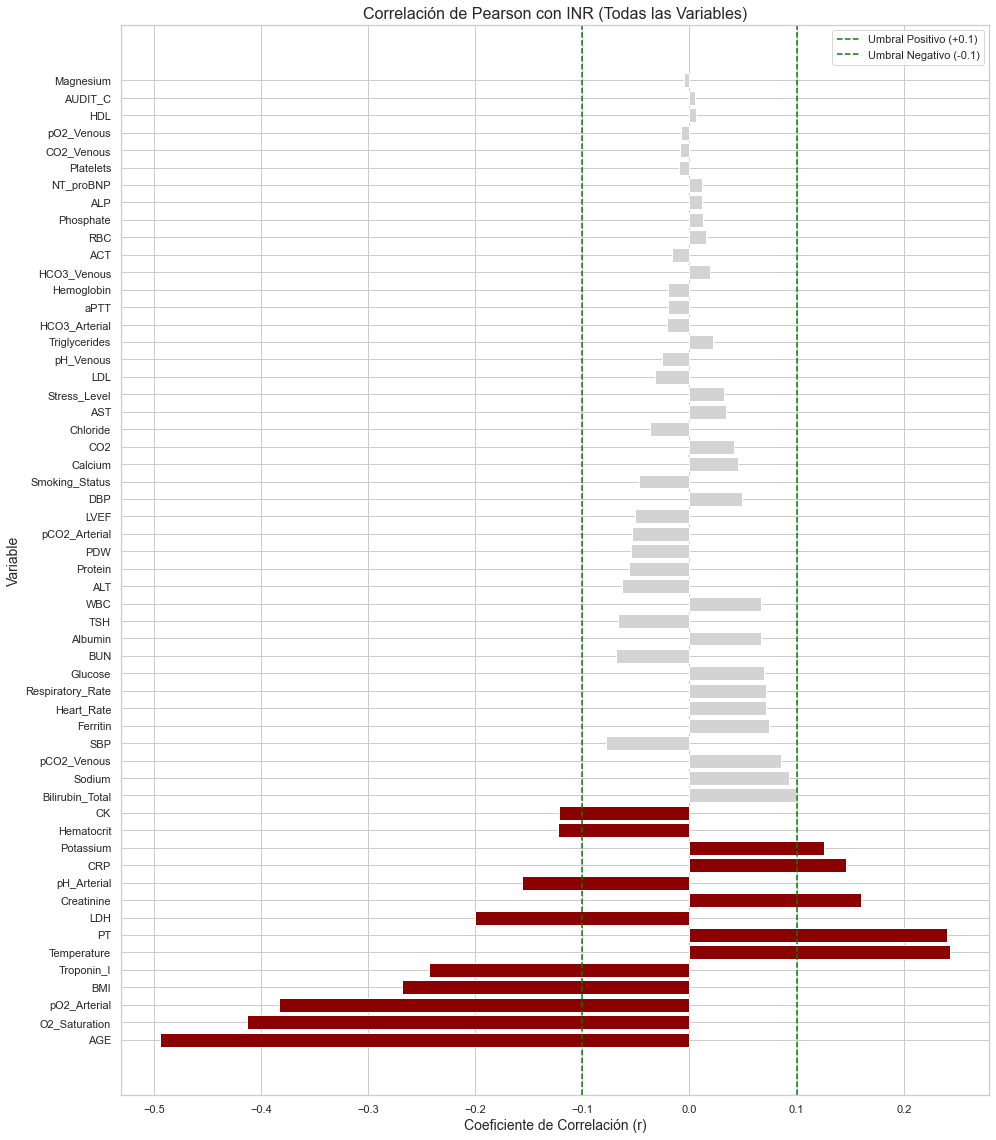

In [122]:
# --- A. Cargar y Filtrar el DataFrame ---
df = df_patients_observations_medications_INR

target_col = 'INR'
threshold = 0.10 
non_numeric_cols_to_keep = ['Id', 'GENDER']

# 1. Identificar las variables con correlación fuerte con INR
df_numeric = df.select_dtypes(include=np.number)
correlations = df_numeric.corr().loc[:, target_col].round(3)
correlations_abs_sorted = correlations.abs().sort_values(ascending=False)

# Filtrar las correlaciones que cumplen el umbral (incluimos 'INR' y las que pasan el umbral)
# Nota: La variable 'INR' siempre tendrá correlación 1 consigo misma, se incluye automáticamente.
# Esta variable 'selected_correlations' contiene SOLO las variables que se quedarán en el DF.
selected_correlations = correlations[correlations.abs() >= threshold]


# 2. Consolidar columnas y ACTUALIZAR el DataFrame (Sobrescribir 'df')
# Las columnas a mantener son las que pasaron el umbral, más las no-numéricas.
columns_to_keep = list(set(selected_correlations.index.tolist() + non_numeric_cols_to_keep))

# Asegurar que 'INR' se incluye si no pasó el umbral (aunque debería haber pasado con 1.0)
if target_col not in columns_to_keep:
    columns_to_keep.append(target_col)
    
df_patients_observations_medications_INR = df[columns_to_keep].copy() # Esta línea es la que SÍ actualiza el DF

print(f"✅ DataFrame 'df' actualizado. Columnas: {df.shape[1]}")
print(df.columns.tolist())

# --- 5. Generar el Plot de Correlaciones (MODIFICADO) ---

plt.figure(figsize=(14, 16)) # Aumento el tamaño para acomodar más barras
sns.set_style("whitegrid")

# 1. Usar TODAS las correlaciones calculadas inicialmente (correlations)
# Asegúrate de excluir el 'INR' de la visualización si no quieres verlo con 1.0.
plot_data = correlations.drop(target_col, errors='ignore')

# 2. Ordenar TODAS las variables para el plot por el valor absoluto de la correlación
plot_correlations = plot_data.reindex(plot_data.abs().sort_values(ascending=False).index)

# 3. Definir colores: rojo oscuro para las que pasan el umbral, gris claro para las que no
colores = ['darkred' if abs(r) >= threshold else 'lightgray' for r in plot_correlations.values]


# Gráfico de barras
bars = plt.barh(plot_correlations.index, plot_correlations.values, color=colores)

# Añadir línea de umbral
plt.axvline(threshold, color='green', linestyle='--', linewidth=1.5, label=f'Umbral Positivo (+{threshold})')
plt.axvline(-threshold, color='green', linestyle='--', linewidth=1.5, label=f'Umbral Negativo (-{threshold})')

plt.title(f'Correlación de Pearson con INR (Todas las Variables)', fontsize=16)
plt.xlabel('Coeficiente de Correlación (r)', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

#### 2.3.1.1 Pair plots para detectar visualmente valoes atípicos y potenciales relaciones entre variables

Número de Pair Plots a generar: 3
Variables totales a plotear: 15



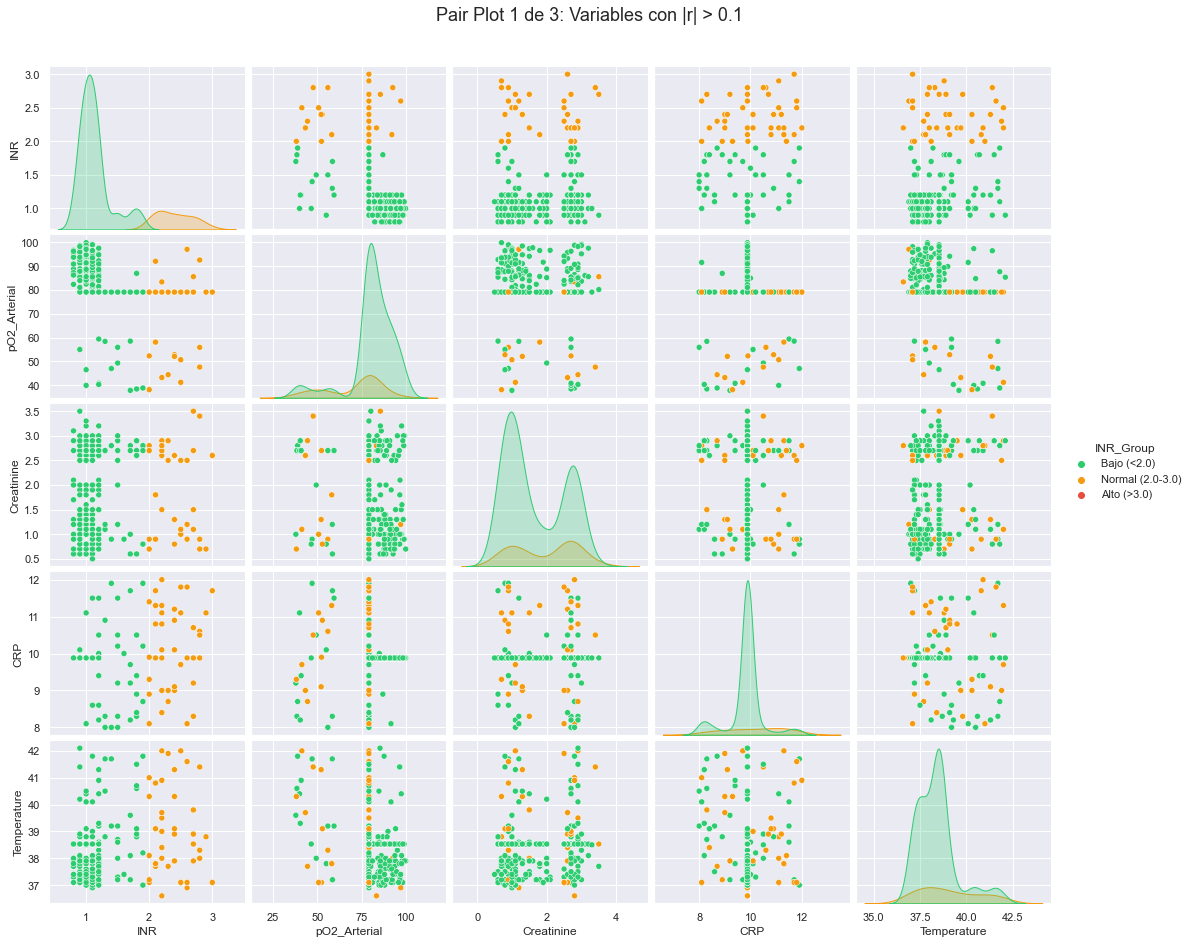

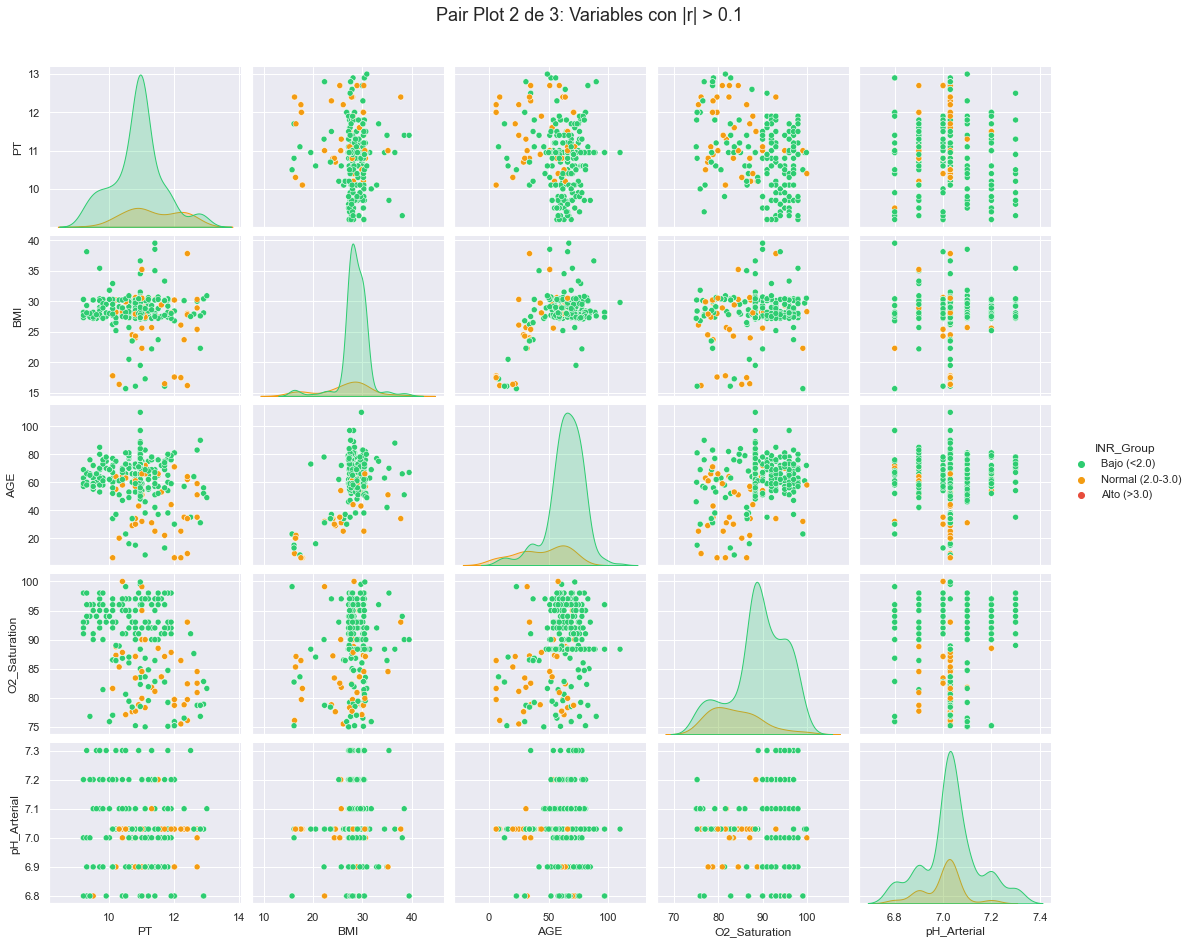

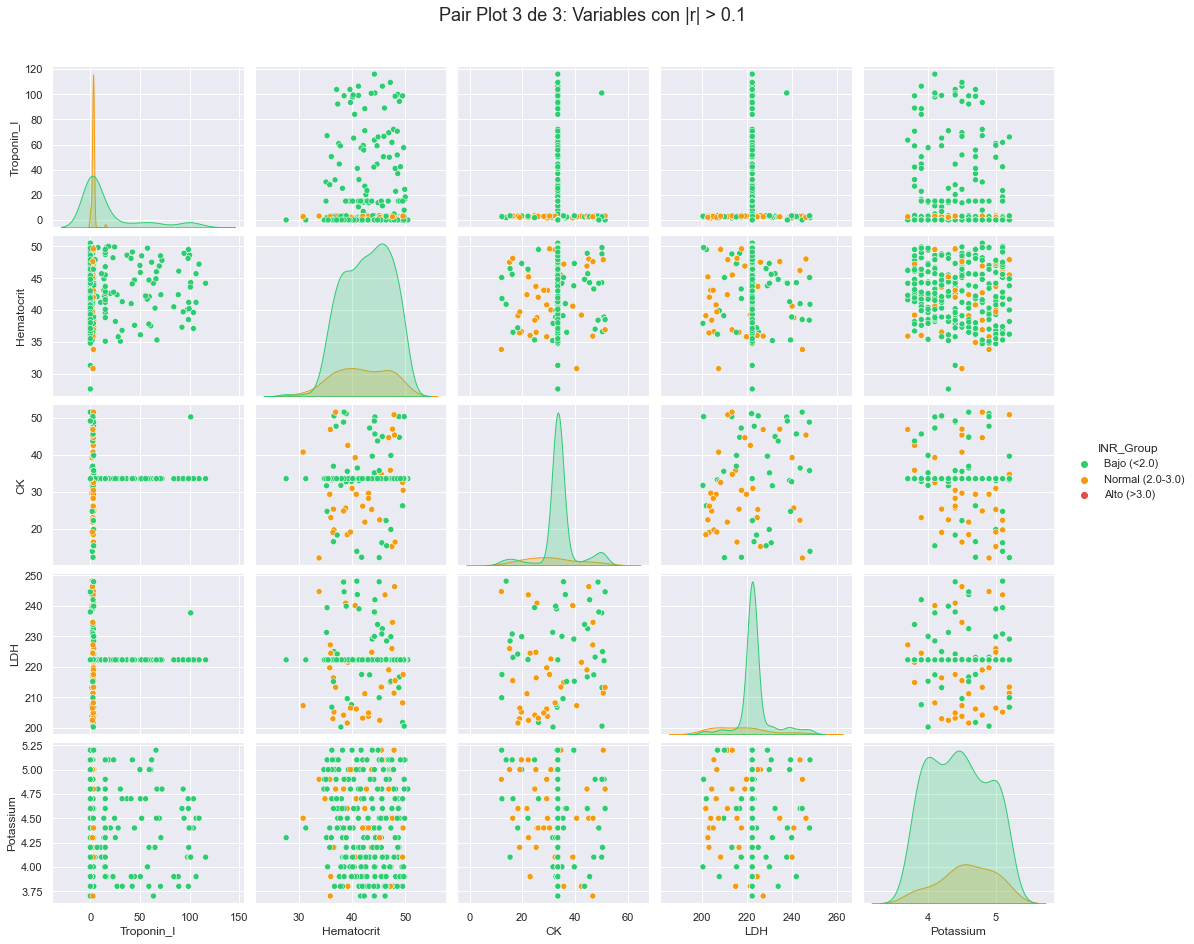

In [124]:
# Cargar el DataFrame
df = df_patients_observations_medications_INR
target_col = 'INR'
# 3. Crear la columna INR_Group (Necesaria para el 'hue' del pair plot)
bins = [df[target_col].min() - 1, 2.0, 3.0 + 1e-6, df[target_col].max() + 1]
df['INR_Group'] = pd.cut(df[target_col], 
                        bins=bins, 
                        labels=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)'], 
                        right=False, 
                        include_lowest=True).astype('category')

# --- B. Preparación para el Ploteo en Subgrupos ---

# 4. Obtener las características numéricas para plotear (excluyendo 'Id')
plot_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Id' in plot_features:
    plot_features.remove('Id')

# 5. Dividir la lista en chunks de 5 variables
chunk_size = 5
chunks = [plot_features[i:i + chunk_size] for i in range(0, len(plot_features), chunk_size)]

# 6. Definir estilo y colores
colors = ["#2ecc71", "#f39c12", "#e74c3c"] # Verde, Amarillo, Rojo
hue_order=['Bajo (<2.0)', 'Normal (2.0-3.0)', 'Alto (>3.0)']
sns.set(font_scale = 1.0)
threshold_display = 0.10

# --- C. Generar los Plots ---

print(f"Número de Pair Plots a generar: {len(chunks)}")
print(f"Variables totales a plotear: {len(plot_features)}\n")

for i, chunk in enumerate(chunks):
    plot_df = df[chunk + ['INR_Group']]
    
    # Generar el pairplot
    ax = sns.pairplot(plot_df, 
                      hue='INR_Group', 
                      palette=colors, 
                      hue_order=hue_order, 
                      height=2.5, 
                      aspect = 1.2,
                      kind="scatter", 
                      diag_kind="kde") 

    title = f'Pair Plot {i+1} de {len(chunks)}: Variables con |r| > {threshold_display}'
    ax.fig.suptitle(title, size=18, y = 1.05)
    
    # Mostrar el plot
    plt.show()

El desglose en grupos más pequeños hace que los gráficos sean mucho más fáciles de interpretar.Pair Plot 1 de 4 (Variables Fuertemente Negativas)Las variables en este grupo son las que tienden a disminuir cuando el $\text{INR}$ aumenta, y viceversa.INR vs. AGE: Reafirma la correlación negativa más fuerte ($r \approx -0.49$). Los pacientes más viejos (valores altos de AGE) se concentran en el rango Bajo de $\text{INR}$ (verde), indicando un alto riesgo de trombosis.INR vs. O2_Saturation: Muestra una correlación negativa. Los pacientes con $\text{INR}$ más bajos (verde) son aquellos con saturaciones de oxígeno más altas.Distribuciones (Diagonal): Se observa que AGE y O2_Saturation son las variables con las distribuciones más sesgadas, lo que confirma su rol como los mayores factores de varianza en $\text{PC}_1$.Pair Plot 2 de 4 (Factores Cardiovasculares y Metabólicos)INR vs. Hemoglobin y Hematocrit: Se observa una correlación positiva débil o nula. Aunque estas variables tienen una correlación fuerte entre sí (como vimos en el heatmap), su relación con el $\text{INR}$ es muy débil. La dispersión es alta, lo que muestra que estas variables no son buenos predictores directos del $\text{INR}$.INR vs. SBP (Presión Sistólica): No se aprecia una tendencia lineal clara. El rango Normal (amarillo) parece estar distribuido a lo largo de todo el rango de $\text{SBP}$, lo que sugiere una relación no lineal o que la $\text{SBP}$ no es un factor dominante.Pair Plot 3 de 4 (Biomarcadores y Función Renal)INR vs. Creatinine: Se observa una correlación positiva débil o nula. Esto contrasta con la correlación negativa fuerte entre $\text{AGE}$ y $\text{Creatinine}$ vista en el heatmap. Sugiere que, aunque la edad influye en la función renal, la función renal en sí misma no predice bien el $\text{INR}$.INR vs. Heart_Rate: La dispersión es alta, indicando una relación muy débil.Conclusión a Nivel de Pair PlotLos gráficos confirman que la Edad y la Saturación de $\text{O}_2$ son las variables originales que mejor separan visualmente a los grupos de $\text{INR}$, siendo el grupo de riesgo de trombosis (Bajo, verde) el más influenciado por estos factores. El resto de las variables filtradas, aunque tienen una correlación matemática por encima de $0.10$, muestran una alta dispersión y por sí solas no son suficientes para distinguir claramente los rangos terapéuticos

#### 2.3.1.2. Distribución de frecuencias